# Neste desafio:
- Realizar a média da metragem para cada um dos bairros
- Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas)
- Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão
- Pegar outras estatísticas dos dados (como média, mediana, min, max)
- Descobrir quais são os bairros que não tem nome de rua

In [ ]:
#Importar bibliotecas
import pandas as pd

#Variavel com a base de dados tratada pelos professores para este desafio(base original: Base de dados original)
base = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

#Criando o Dataframe
df_dados = pd.read_csv(base)

In [ ]:
df_dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


# Realizar a média da metragem para cada um dos bairros

In [ ]:
#Criando dataframe somente com os dados das colunas Bairro e Metragem
df_bairro_metragem = (df_dados[["Bairro",
                            "Metragem"]])
df_bairro_metragem.head()

,Bairro,Metragem
0,Planalto Paulista,1000
1,Jardim dos Estados,496
2,Jardim Reimberg,125
3,Jardim Morumbi,310
4,Mooca,100


In [ ]:
#Agrupando dataframe pela coluna Bairro e obtrando a média da metragem para cada um dos bairros
df_bairro_metragem.groupby('Bairro')['Metragem'].mean().sort_values(ascending = False).head(10)

Bairro
Sítio Represa                 37000.000000
Vila Castelo                   2850.000000
Jardim Guedala                 2486.640199
Jardim das Camélias            1700.000000
Chácara Flora                  1260.727273
Jardim Sílvia (Zona Oeste)     1189.258065
Retiro Morumbi                 1084.045455
Vila Aurora (Zona Norte)       1082.500000
Paineiras do Morumbi            757.266667
Vila Ivone                      722.500000
Name: Metragem, dtype: float64

# Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas)

In [ ]:
#Primeira forma
df_dados.Bairro.head()

0     Planalto Paulista
1    Jardim dos Estados
2       Jardim Reimberg
3        Jardim Morumbi
4                 Mooca
Name: Bairro, dtype: object

In [ ]:
#Segunda forma
df_dados['Bairro'].head()

0     Planalto Paulista
1    Jardim dos Estados
2       Jardim Reimberg
3        Jardim Morumbi
4                 Mooca
Name: Bairro, dtype: object

# Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão

O objetivo do gráfico a seguir é analisar e mostrar a media de valor dos imoveis em cada bairro. (tanto aluguel e compra)

In [211]:
#Criando o dataframe com as colunas Bairro e Valor
df_imoveis = df_dados[['Bairro',
                      'Valor']]
df_imoveis.head(100000)

,Bairro,Valor
0,Planalto Paulista,R$ 7.000.000
1,Jardim dos Estados,R$ 3.700.000
2,Jardim Reimberg,R$ 380.000
3,Jardim Morumbi,R$ 685.000
4,Mooca,R$ 540.000
...,...,...
10003,Vila Sofia,R$ 665.000
10004,Bosque da Saúde,R$ 2.300.000
10005,Vila da Saúde,R$ 1.050.000
10006,Vila Oratório,R$ 2.200\n /Mês


In [177]:
#O primeiro desafio é ajustar a base, descobrindo quais imovéis são alugados. Com isso iremos criar a coluna Alugada, onde True = Alugado; False = Não alugado
df_imoveis['Alugado_Mes'] = df_imoveis['Valor'].str.contains('/Mês')
df_imoveis['Alugado_Ano'] = df_imoveis['Valor'].str.contains('/Ano')
df_imoveis['Alugado_Dia'] = df_imoveis['Valor'].str.contains('/Dia')
df_imoveis.head(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
0,Planalto Paulista,R$ 7.000.000,False,False,False
1,Jardim dos Estados,R$ 3.700.000,False,False,False
2,Jardim Reimberg,R$ 380.000,False,False,False
3,Jardim Morumbi,R$ 685.000,False,False,False
4,Mooca,R$ 540.000,False,False,False
...,...,...,...,...,...
995,Pacaembu,R$ 3.600.000,False,False,False
996,Super Quadra Morumbi,R$ 17.000\n /Mês,True,False,False
997,Chácara Monte Alegre,R$ 3.990.000,False,False,False
998,São João Clímaco,R$ 5.500\n /Mês,True,False,False


,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
6639,Jardim Guedala,R$ 15.000\n /Dia,False,False,True
7421,Jardim Guedala,R$ 15.000\n /Dia,False,False,True


In [196]:
#Criar dois dataframes imoveis, um de imoveis alugados e outro de imoveis para compra

#Imoveis Alugado
df_imoveis_alugado = df_imoveis.query("Alugado_Mes == True")
df_imoveis_alugado.head()

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
151,Bosque da Saúde,R$ 11.000\n /Mês,True,False,False
156,Jardim Paulistano,R$ 12.000\n /Mês,True,False,False
175,Jardim Paulista,R$ 25.000\n /Mês,True,False,False
178,Lapa,R$ 30.000\n /Mês,True,False,False
182,Butantã,R$ 10.000\n /Mês,True,False,False


In [197]:
#Imoveis Compra
df_imoveis_compra = df_imoveis.query("Alugado_Mes==False & Alugado_Dia == False & Alugado_Ano == False")
df_imoveis_compra.head()

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
0,Planalto Paulista,R$ 7.000.000,False,False,False
1,Jardim dos Estados,R$ 3.700.000,False,False,False
2,Jardim Reimberg,R$ 380.000,False,False,False
3,Jardim Morumbi,R$ 685.000,False,False,False
4,Mooca,R$ 540.000,False,False,False


In [198]:
#Manipular coluna valor para transformar em numeros para imoveis de compra
df_imoveis_compra['Valor'] = df_imoveis_compra['Valor'].str.lstrip('R$ ').str.replace('.','')
df_imoveis_compra['Valor'] = pd.to_numeric(df_imoveis_compra['Valor'], errors='coerce')
df_imoveis_compra.head(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from 

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
0,Planalto Paulista,7000000,False,False,False
1,Jardim dos Estados,3700000,False,False,False
2,Jardim Reimberg,380000,False,False,False
3,Jardim Morumbi,685000,False,False,False
4,Mooca,540000,False,False,False


In [213]:
df_imoveis_compra.head(10000)

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
0,Planalto Paulista,7000000,False,False,False
1,Jardim dos Estados,3700000,False,False,False
2,Jardim Reimberg,380000,False,False,False
3,Jardim Morumbi,685000,False,False,False
4,Mooca,540000,False,False,False
...,...,...,...,...,...
10002,Planalto Paulista,1500000,False,False,False
10003,Vila Sofia,665000,False,False,False
10004,Bosque da Saúde,2300000,False,False,False
10005,Vila da Saúde,1050000,False,False,False


In [199]:
#Manipular coluna valor para transformar em numeros para imoveis de aluguel
df_imoveis_alugado['Valor'] = df_imoveis_alugado['Valor'].str.lstrip('R$ ').str.rstrip('\n /Mês').str.replace('.','')
df_imoveis_alugado['Valor'] = pd.to_numeric(df_imoveis_alugado['Valor'], errors='coerce')
df_imoveis_alugado.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from 

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
151,Bosque da Saúde,11000,True,False,False
156,Jardim Paulistano,12000,True,False,False
175,Jardim Paulista,25000,True,False,False
178,Lapa,30000,True,False,False
182,Butantã,10000,True,False,False


In [250]:
#Agrupar bairros
import matplotlib.pyplot as plt

df_imoveis_alugado_media = df_imoveis_alugado.groupby('Bairro')['Valor'].mean().sort_values(ascending = True)
df_imoveis_compra_media = df_imoveis_compra.groupby('Bairro')['Valor'].mean().sort_values(ascending = True)


In [251]:
df_imoveis_alugado_media.head()

Bairro
Jardim D'Abril                  1650.0
Vila União(Zona Norte)          1980.0
Vila Constança                  2000.0
Jardim São Paulo(Zona Norte)    2000.0
Vila Oratório                   2200.0
Name: Valor, dtype: float64

In [252]:
df_imoveis_compra_media.head()

Bairro
Vila Aurea             165000.0
Vila Cardoso Franco    180000.0
Jardim Morais Prado    180000.0
Jardim Benfica         199900.0
Jardim São José        213850.0
Name: Valor, dtype: float64

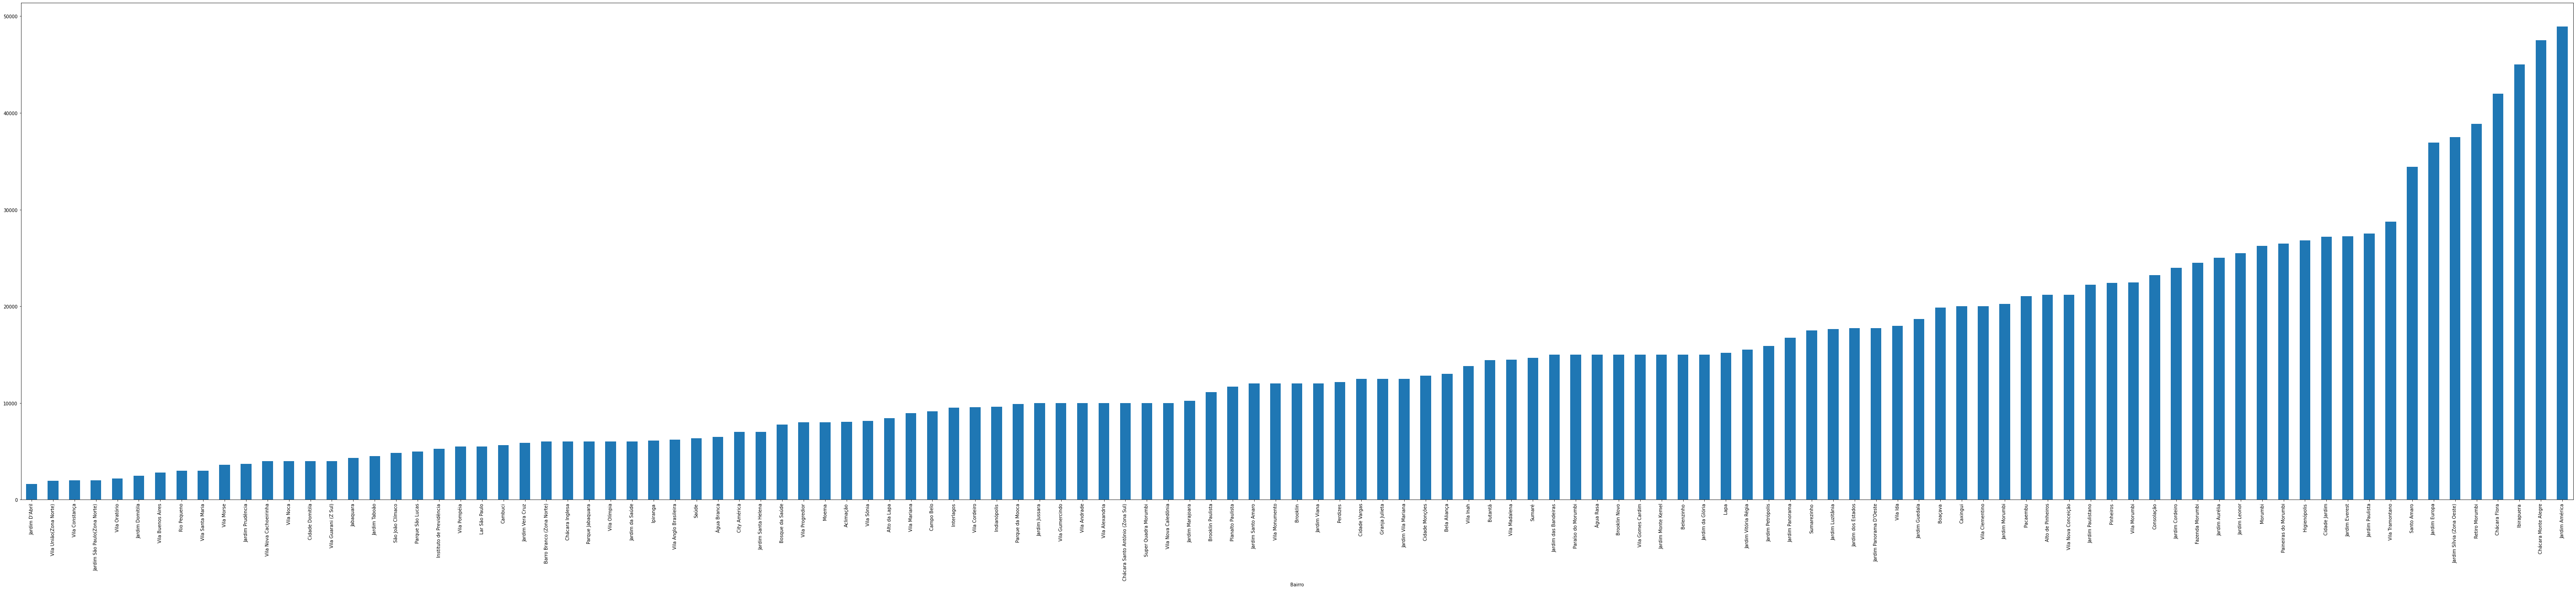

In [297]:
plt.figure(figsize=(100,20))

df_imoveis_alugado_media.plot.bar()
plt.show()

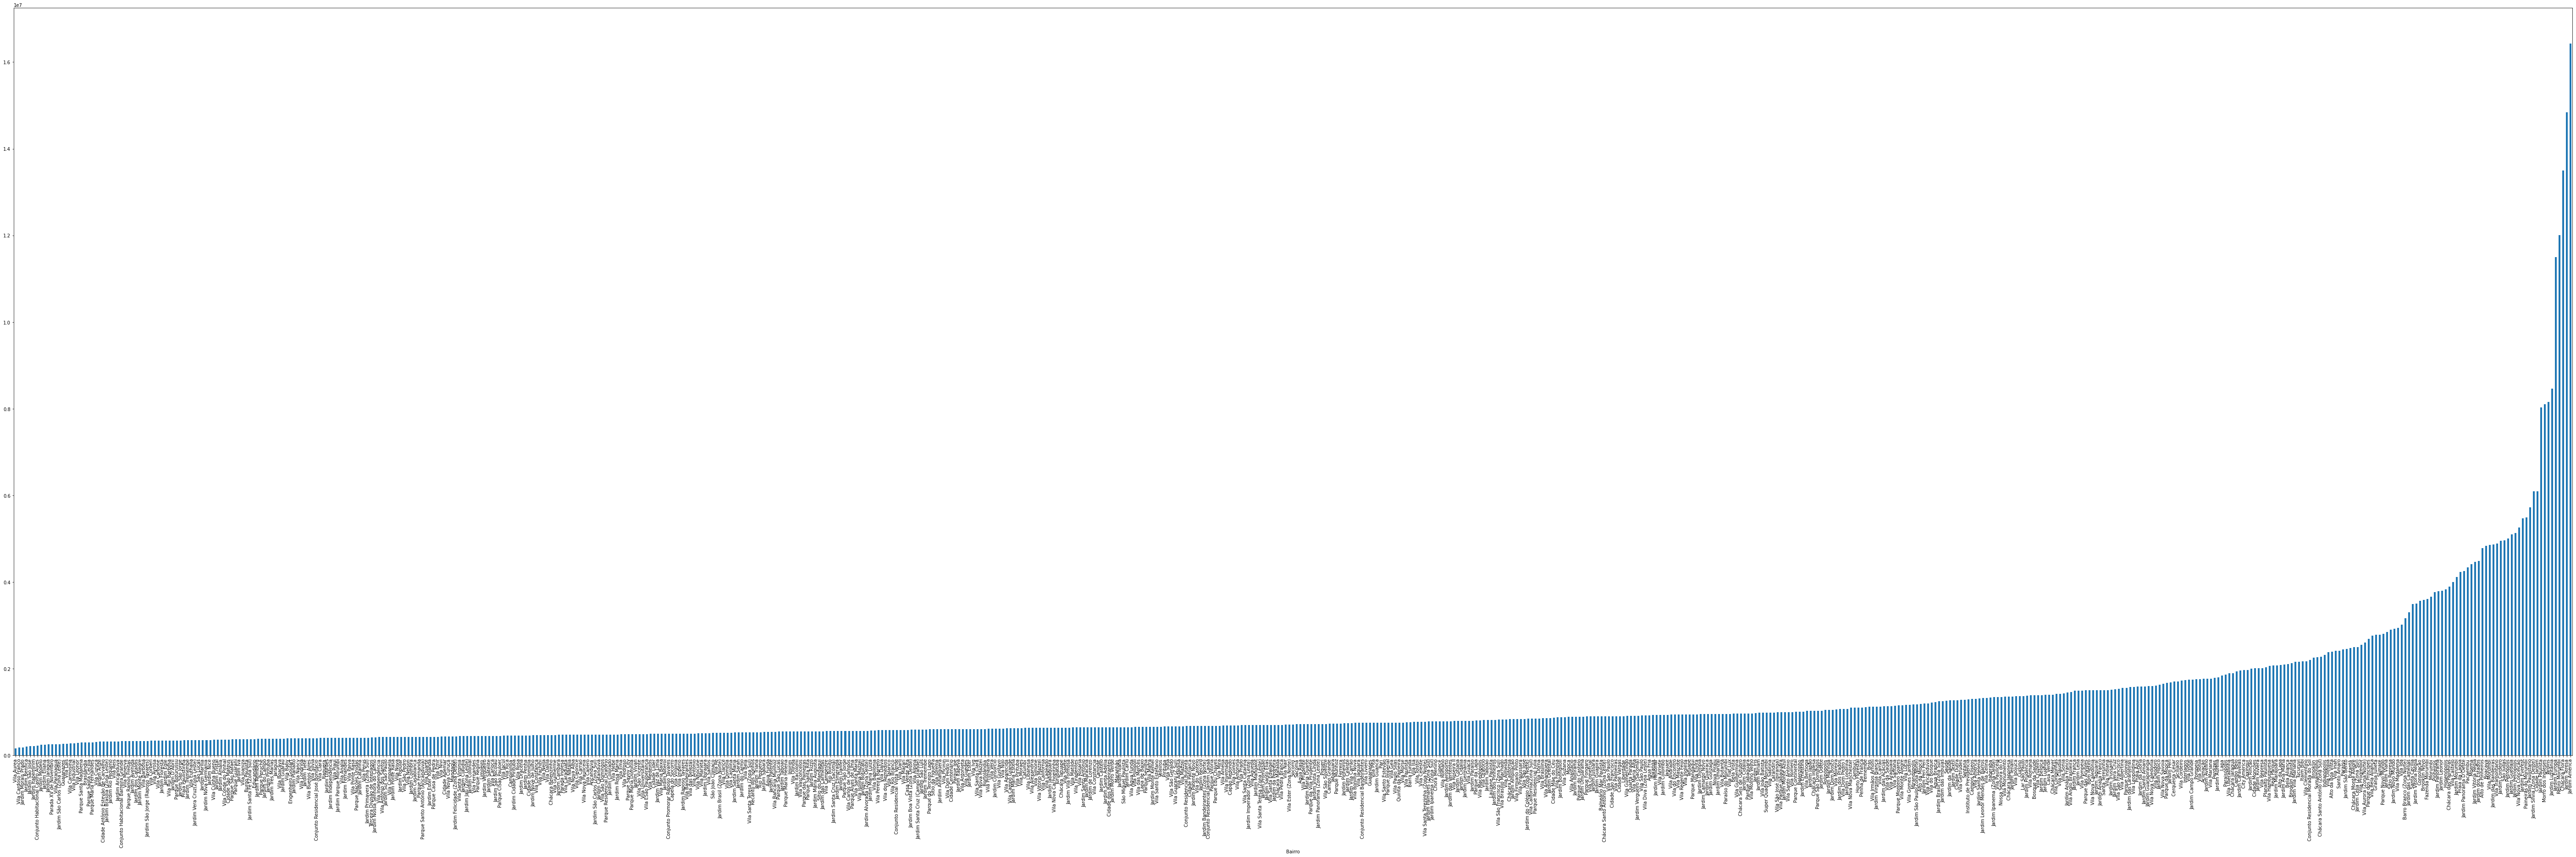

In [298]:
plt.figure(figsize=(100,30))

df_imoveis_compra_media.plot.bar()
plt.show()

Com isso, concluímos que:
- Na cidade de São Paulo, o bairro que possuí a média doos imóveis para compra e aluguel é o Jardim América
- O bairro que possui a média de imóvel mais barato para alugar é Jardim D'Abril.
- O bairro que possui a média de imóvel mais barato para compra é Vila Aurea

(Os imóveis que são pagos por /Dia e /Ano foram desconsiderados nessa pesquisa)

# Pegar outras estatísticas dos dados (como média, mediana, mim, max).

No exemplo anterior nós tiramos a média, agora iremos tirar a mediana, min e max dos bairros.

Bairros - Aluguel:

In [271]:
#Mediana
df_imoveis_alugado['Valor'].median()

16000.0

In [283]:
#Minima
df_imoveis_alugado['Valor'].min()

1650

In [284]:
df_imoveis_alugado.query("Valor==1650")

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
359,Jardim D'Abril,1650,True,False,False


In [285]:
#Maxima
df_imoveis_alugado['Valor'].max()

120000

In [286]:
df_imoveis_alugado.query("Valor==120000")

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
2837,Morumbi,120000,True,False,False


Bairros - Compra

In [287]:
#Mediana
df_imoveis_compra['Valor'].median()

1800000.0

In [288]:
#Minima
df_imoveis_compra['Valor'].min()

13000

In [289]:
df_imoveis_compra.query("Valor==13000")

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
60,Jardim Europa,13000,False,False,False


In [290]:
#Maxima
df_imoveis_compra['Valor'].max()

65000000

In [291]:
df_imoveis_compra.query("Valor==65000000")

,Bairro,Valor,Alugado_Mes,Alugado_Ano,Alugado_Dia
400,Jardim Europa,65000000,False,False,False
1530,Jardim América,65000000,False,False,False
6882,Jardim América,65000000,False,False,False


Com isso, concluímos que:
- Para os imóveis alugados:
  - A mediana no Valor é de R$ 16000,00
  
  - O menor Valor se encontra no Bairro de Jardim D'Abril com o valor de R$ 1650,00
 
  - O maior Valor se encontra no Bairro Morumbi com o valor de R$ 120000,00

- Para os imóveis de compra:
  - A mediana no Valor é de R$ 1800000,00
  
  - O menor Valor se encontra no Bairro de Jardim Europa com o valor de R$ 13000,00
 
  - Há 3 imóveis com o mesmo valor Máximo encontrado, sendo eles, 2 no bairro Jardim América e outro no Jardim Europa com o valor de R$ 65000000,00


(Podemos notar que o valor mínimo e máximo dos imóveis de compra se encontram no mesmo bairro - o que vale a pena revisar depois a base de dados)

# Descobrir quais são os bairros que não tem nome de rua.

In [312]:
bool_series = pd.isnull(df_dados["Rua"])
df_bairros_nrua = df_dados[bool_series]

df_bairros_nrua

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [321]:
df_bairros_nrua.groupby('Bairro')['Cidade'].count()

Bairro
Aclimação              2
Alto da Boa Vista      1
Alto da Lapa          29
Alto da Mooca          5
Alto de Pinheiros    169
                    ... 
Vila do Encontro       3
Água Branca            2
Água Fria              1
Água Funda             2
Água Rasa              3
Name: Cidade, Length: 394, dtype: int64

Com isso, concluímos que:
- 3434 Imóveis não possuem dados da rua
- E há no total 394 Bairros que em sua região não há registros de algumas ruas